# Project 2_Multiple Linear Regression

In [7]:
# Understanding Dataset
import pandas as pd
advertising_multi = pd.read_csv(r"C:\Users\royim\OneDrive\Desktop\Udemy Courses_Practice\Kaggle Master\Project 2_Multiple Linear Regression\Multplr_LR_Code_for Udemy\advertising.csv")
advertising_multi.head()
advertising_multi.tail()
advertising_multi.info()
advertising_multi.shape
advertising_multi.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


## Visualizing Data

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

C:\Users\royim\anaconda4\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


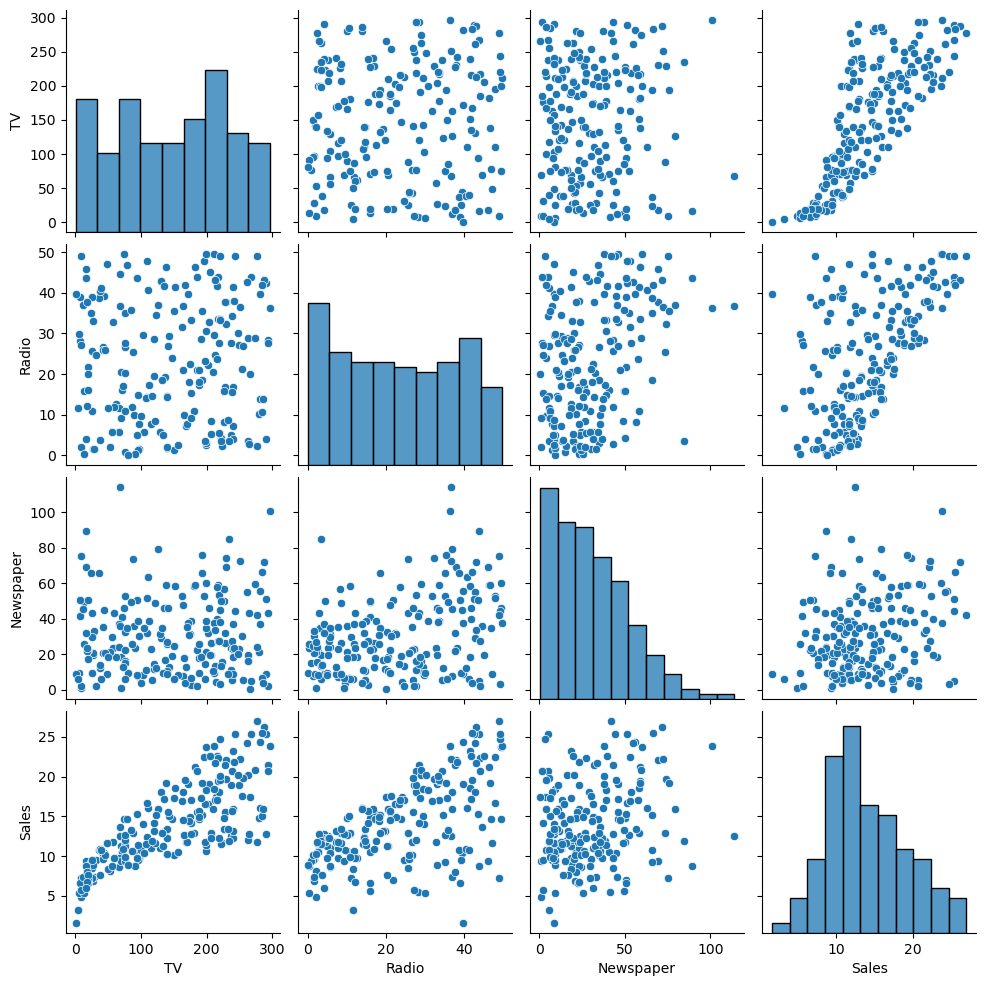

In [9]:
# Lets plot a pair plot of all variables in our dataframe
sns.pairplot(advertising_multi)

C:\Users\royim\anaconda4\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


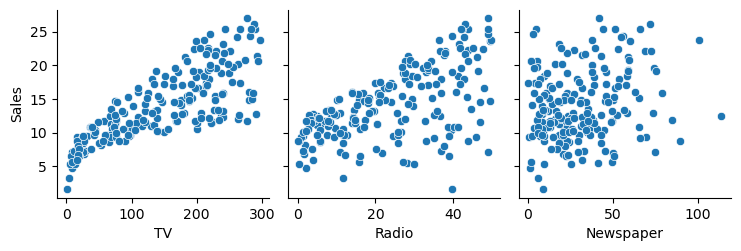

In [10]:
# Visualize the relationships b/w the features and the response using scatterplots
sns.pairplot(advertising_multi, x_vars=['TV', 'Radio', 'Newspaper'], y_vars='Sales')

## Splitting the Data for Training and Testing

In [11]:
# Putting feature variable to X
X = advertising_multi[['TV', 'Radio', 'Newspaper']]

# Putting response variable to y
y = advertising_multi['Sales']

In [13]:
# random_state is the seed used by the random number generator. It can be any integer.
#from sklearn.cross_validation import train_test_split # Not working
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state = 100)

## Performing inear Regression

In [14]:
from sklearn.linear_model import LinearRegression

# Representing LinearRegression as lr (Creating Linear Regression Object)
lm = LinearRegression()

# fit the model to the training data
lm.fit(X_train, y_train)

LinearRegression()

## Model Evaluation

In [16]:
print(lm.intercept_)

2.652789668879496


In [18]:
# Lets see the co-efficient
coeff_df = pd.DataFrame(lm.coef_,X_test.columns,columns=['Coefficient'])
coeff_df

,Coefficient
TV,0.045426
Radio,0.189758
Newspaper,0.004603


#### From above if we increase TV sales by 1 unit, overall sales will affect 0.045 units

## Predictions

In [22]:
# Making Predictions using model
y_pred = lm.predict(X_test)

## Calculating Error Terms

In [24]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

In [26]:
print('Mean_Squared_Error: ', mean_squared_error)
print('r_square_value: ', r_squared)

Mean_Squared_Error:  <function mean_squared_error at 0x000001E981E6D4E0>
r_square_value:  0.9058622107532246


## Optional Steps: Checking for P-value using STATSMODELS

In [28]:
import statsmodels.api as sm
X_train_sm = X_train
# Unlike SKLearn, statsmodels dont automatically fit constant
# So, you need to use the method sm.add_constant(X) in order to add a constant
X_train_sm = sm.add_constant(X_train_sm)
# Create a fitted model in one line
lm_1 = sm.OLS(y_train, X_train_sm).fit()
# Print the coefficients
lm_1.params

const        2.652790
TV           0.045426
Radio        0.189758
Newspaper    0.004603
dtype: float64

In [29]:
print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.890
Method:                 Least Squares   F-statistic:                     377.6
Date:                Thu, 11 Jul 2024   Prob (F-statistic):           9.97e-66
Time:                        16:51:31   Log-Likelihood:                -280.83
No. Observations:                 140   AIC:                             569.7
Df Residuals:                     136   BIC:                             581.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.6528      0.384      6.906      0.0

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<Axes: >

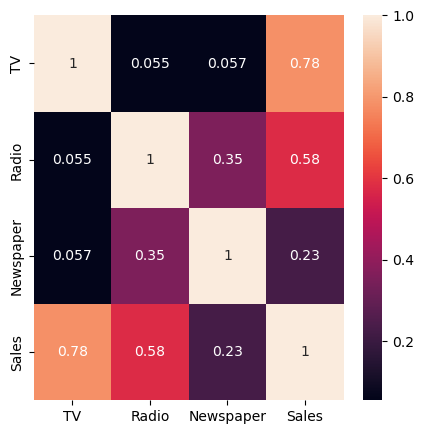

In [31]:
plt.figure(figsize = (5,5))
sns.heatmap(advertising_multi.corr(), annot=True)

## Implementing the results and running the model again

#### From the above data, it is concluded that Newspaper is insignificant

In [32]:
# Removing Newspaper from our dataset
X_train_new = X_train[['TV','Radio']]
X_test_new = X_test[['TV','Radio']]

In [33]:
# Model building
lm.fit(X_train_new, y_train)

LinearRegression()

In [34]:
## Making Predictions
y_pred_new = lm.predict(X_test_new)

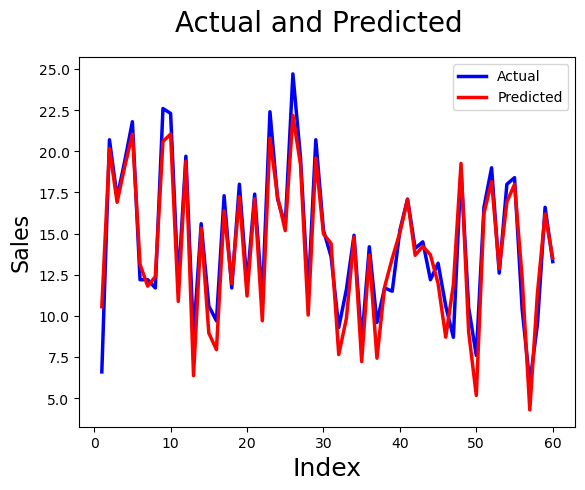

In [49]:
import matplotlib.pyplot as plt

c = [i for i in range(1, 61, 1)]
fig = plt.figure()
plt.plot(c, y_test, color='blue', linewidth=2.5, linestyle='-')
plt.plot(c, y_pred_new, color='red', linewidth=2.5, linestyle='-')
fig.suptitle('Actual and Predicted', fontsize=20)  # Plot heading
plt.xlabel('Index', fontsize=18)
plt.ylabel('Sales', fontsize=16)
plt.legend(['Actual', 'Predicted'], loc='upper right')  # Adding legend for clarity
plt.show()


Text(0, 0.5, 'Sales')

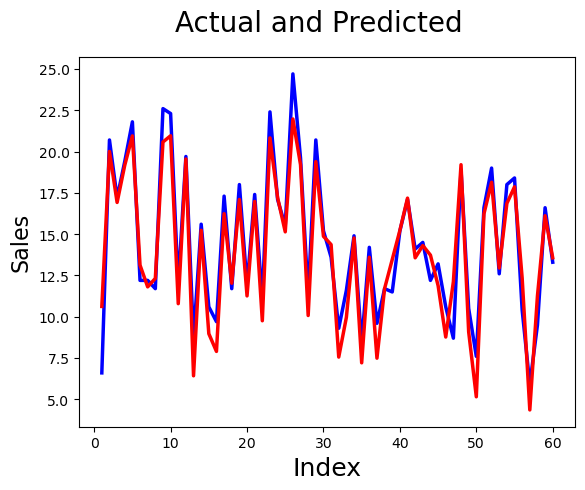

In [50]:
# Actual vs Predicted
c = [i for i in range(1,61,1)]
fig = plt.figure()
plt.plot(c, y_test, color='blue', linewidth=2.5, linestyle='-')
plt.plot(c, y_pred, color='red', linewidth=2.5, linestyle ='-')
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading
plt.xlabel('Index', fontsize=18)
plt.ylabel('Sales', fontsize=16)

Text(0, 0.5, 'ytest-ypred')

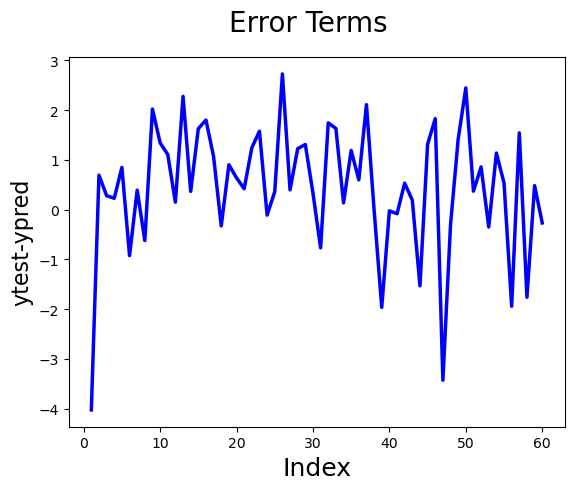

In [57]:
# Error Terms
c = [i for i in range(1,61,1)]
fig = plt.figure()
plt.plot(c, y_test-y_pred, color='blue', linewidth=2.5, linestyle='-')
fig.suptitle('Error Terms', fontsize=20)
plt.xlabel('Index', fontsize=18)
plt.ylabel('ytest-ypred', fontsize=16)

In [58]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred_new)
r_squared = r2_score(y_test, y_pred_new)

In [59]:
print('mean_squared_error: ', mse)
print('r_squared: ', r_squared)

mean_squared_error:  1.784740052090281
r_squared:  0.909216449171822


In [60]:
X_train_final = X_train_new
# Unlike SKLear, statsmodels dont automatically fit a constant
# So you need to use the method sm.add_constant(X) in order to add a constant
X_train_final = sm.add_constant(X_train_final)
# Create a fitted model in one line
lm_final = sm.OLS(y_train, X_train_final).fit()
print(lm_final.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     568.8
Date:                Thu, 11 Jul 2024   Prob (F-statistic):           4.46e-67
Time:                        20:36:05   Log-Likelihood:                -281.03
No. Observations:                 140   AIC:                             568.1
Df Residuals:                     137   BIC:                             576.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.7190      0.368      7.392      0.0

## Simple Linear Regression: Newspaper(X) and Sales(y)

In [64]:
import pandas as pd
import numpy as np
# Importing dataset
advertising_multi = pd.read_csv(r"C:\Users\royim\OneDrive\Desktop\Udemy Courses_Practice\Kaggle Master\Project 2_Multiple Linear Regression\Multplr_LR_Code_for Udemy\advertising.csv")
x_news = advertising_multi['Newspaper']
y_news = advertising_multi['Sales']

# Data Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_news, y_news, train_size = 0.7, random_state=110)

# Required only in the case of simple linear regression
X_train = X_train.values.reshape(-1, 1)  # Reshape as 2D array
X_test = X_test.values.reshape(-1, 1)    # Reshape as 2D array

# Linear regression from sklearn
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

# Fitting the model
lm.fit(X_train, y_train)

# Making Predictions
y_pred = lm.predict(X_test)

# Importing mean square error and r square from sklearn library
from sklearn.metrics import mean_squared_error, r2_score

# Computing mean square error and R square value
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

# Printing the Mean Square Error and R Square value
print('Mean_Squared_Error: ', mse)
print('r_square_value: ', r_squared)

Mean_Squared_Error:  23.84732008485191
r_square_value:  0.08182413570736657
